# Homework 4: Neural Networks for Recognition, Detection, and Tracking

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.


# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Theory


## Q1.1 (3 points)


Softmax is defined as below, for each index $i$ in a vector $x \in \mathbb{R}^d$.
$$ softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Prove that softmax is invariant to translation, that is
$$ softmax(x) = softmax(x + c) \quad \forall c \in \mathbb{R}.$$    
Often we use $c = -\max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c=0$ and $c = -\max x_i$)

---

$$
softmax(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

Adding a translation element 'c',
$$
softmax(x+c)_i = \frac{e^{x_i+c}}{\sum_j e^{x_j+c}}
$$
This can be simplified to,
$$
softmax(x+c)_i = \frac{e^c e^{x_i}}{\sum_j e^c e^{x_j}} = \frac{e^{x_i}}{\sum_j  e^{x_j}}
$$
Hence, softmax is invariant to rotation.

Using c = - max $x_i$ is a good idea because:
1. The range of values is smaller. The largest value in x becomes 0 and all other values are negative. This means that the numerator $ e^{x_i - max (x_i)} $ will now always lie in the range (0,1]. Without the translation, the numerator $e^{x_i}$ can become very large.
1. This new range of values will be more numerically stable and precise as it is a shorter range, resulting is reduced risk of overflow or underflow.

---

## Q1.2

Softmax can be written as a three-step process, with $s_i = e^{x_i}$, $S = \sum s_i$ and $softmax(x)_i = \frac{1}{S} s_i$.

### Q1.2.1 (1 point)

As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

---

The range of each element of $softmax(x)$ is (0,1). This is due to the fact that the numerator $e^{x_i}$ is always positive for any $x \in \mathbb{R}^d$ and the division by the sum of all elements ensures each element is less than 1.

The sum over all elements $\sum_i softmax(x)_i$ is always equal to 1. This is a result of the normalisation step, where each element is divided by the sum of all elements.

---

### Q1.2.2 (1 point)

One could say that $\textit{"softmax takes an arbitrary real valued vector $x$ and turns it into a $\rule{3cm}{0.1mm}$''}$.

---

probability distribution


---

### Q1.2.3 (1 point)

Now explain the role of each step in the multi-step process.

---

The role of each step in order is given below:
1. The first step converts all given real values to a positive value.
1. The second step calculates a normalisation factor.
1. This step combines the values calculated in the previous steps to give a final value in the range (0,1).

---

## Q1.3 (3 points)

Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.




---

In a neural network, each layer performs the following operation:
$$
y = \sigma (Wx + b)
$$
where, $\sigma$ represents the activation function. If the activation function is linear, for example, $\sigma(x) = ax$, then a multi-layer neural network with 3 layers can be written as:
$$
y_3 = a(W_3 \cdot a (W_2 \cdot a(W_1x + b1) + b2)+ b3))
$$
Simplifying,
$$
y_3 = (aW_3\cdot aW_2\cdot aW_1)x + (aW_3\cdot aW_2\cdot a) b_1 + (aW_3\cdot a) b_2 + ab_3
$$
Writing this as an equivalent single layer,
$$
y_3 = W_{combined} \cdot x + b_{combined}  \\
W_{combined} = (aW_3\cdot aW_2\cdot aW_1) \\
b_{combined} = (aW_3\cdot aW_2\cdot a) b_1 + (aW_3\cdot a) b_2 + a\cdot b_3
$$
This equation is of the form of linear regression. Hence, proving that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.

---

## Q1.4 (3 points)

Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$, derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly).

---
Given activation function, $\sigma(x) = \frac{1}{1+e^{-x}}$ \\
Deriving the gradient using the quotient rule of differentiation,
$$
\sigma '(x) = \frac {0 \cdot (1+e^{-x}) - 1 \cdot (-e^{-x})}{(1+e^{-x})^2} \\ =\frac {e^{-x}}{(1+e^{-x})^2} \\
= \frac {1+e^{-x} - 1}{(1+e^{-x})^2} \\
= \frac {1}{1+e^{-x}} \cdot (1 - \frac{1}{1+ e^{-x}})
$$
Substituting the value of $\sigma(x)$,
$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$
Hence the derivative is expressed as a function of the value of $\sigma(x)$.

---

## Q1.5 (12 points)

Given $y = Wx + b$ (or $y_i = \sum_{j=1}^d  x_{j} W_{ij} + b_i$), and the gradient of some loss $J$ (a scalar) with respect to $y$, show how to get the gradients $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ x \in \mathbb{R}^{d \times 1} \quad y \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad b \in \mathbb{R}^{k \times 1} \quad \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} $$

---

Given $y_i = \sum_{j=1}^d  x_{j} W_{ij} + b_i$,
The given loss function is $ J = \delta_i y_i$. \\
To find the gradients, the following steps can be followed: \\

1. For $ \frac {\partial J}{\partial W} $ (using the chain rule of differentiation),
$$
\frac {\partial J}{\partial W_{ij}} = \frac {\partial J}{\partial y_i} \cdot \frac {\partial y_i}{\partial W_{ij}} = \delta_i \cdot x_j \\
$$
 - Writing in matrix form,
$$
\frac {\partial J}{\partial W} = \delta^T \cdot x \in \mathbb{R}^{1 \times 1}
$$

1. For $ \frac {\partial J}{\partial x} $ (using the chain rule of differentiation),
$$
\frac {\partial J}{\partial x_j} = \frac {\partial J}{\partial y_i} \cdot \frac {\partial y_i}{\partial x_j} = \delta_i \cdot W_{ij} \\
$$
 - Writing in matrix form,
$$
\frac {\partial J}{\partial x} = \delta^T \cdot W \in \mathbb{R}^{1 \times d}
$$

3. For $ \frac {\partial J}{\partial b}$ (using the chain rule of differentiation),
$$
\frac {\partial J}{\partial b_i} = \frac {\partial J}{\partial y_i} \cdot \frac {\partial y_i}{\partial b_i} = \delta_i \cdot 1 = \delta_i \\
$$
 - Writing in matrix form,
$$
\frac {\partial J} {\partial b} = \delta \in \mathbb{R}^{k \times 1}
$$


---

## Q1.6
When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the backpropogation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

### Q1.6.1 (1 point)

Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the gradient you derived in Q1.4)?

---

The sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$ has a derivative $\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$. \\
If we plot the $\sigma'(x)$ function, we can see that it has a maximum value of $0.25$ which occurs when $\sigma(x) = 0.5$. \\
When the neural network has many layers, the gradient computation will involve several multiplications of the $\sigma' (x)$ value, causing the gradient to exponentially reduce, approaching a value close to zero. Thereby, the partial derivative vanishes.

---

### Q1.6.2 (1 point)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$?

---

The $sigmoid$ function has an output range of $(0, 1)$ \\
The $tanh$ function has an output range of $(-1, 1)$ \\

We might prefer tanh because it has a zero-centered and symmetric output range, which can lead to faster convergence. Additionaly, the derivative of tanh has a large range as compared to the derivative of the sigmoid function.

---

### Q1.6.3 (1 point)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the gradients helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

---

When we plot the gradient of tanh,  $\tanh'(x) = 1 - \tanh(x)^2$ , we can see that the maximum value of tanh is 1, which is 4 times greater than the maximum value of the sigmoid derivative. This will mean that the tanh function will have higher values on average than the sigmoid derivative, leading to less of a vanishing gradient problem.

---

### Q1.6.4 (1 point)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$.

---
Starting with $\sigma(x)$, the following steps show the required scaling and shifting:
$$
\sigma(x) = \frac{1}{1+e^{-x}} \\
2\sigma(2x) = \frac{2}{1+e^{-2x}} \\
1 - 2 \sigma(2x) =  1- \frac{2}{1+e^{-2x}} = \frac {(1+e^{-2x}) - 2}{ 1 + e^{-2x}} = \frac {e^{-2x} - 1}{ 1 + e^{-2x}} \\
2 \sigma(2x) - 1 = \frac {1 - e^{-2x}}{ 1 + e^{-2x}} = tanh(x)
$$
Hence,
$$
tanh(x) = 2 \sigma(2x) - 1
$$

---


# Q2 Implement a Fully Connected Network

Run the following code to import the modules you'll need. When implementing the functions in Q2, make sure you run the test code (provided after Q2.3) along the way to check if your implemented functions work as expected.

In [ ]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches
from mpl_toolkits.axes_grid1 import ImageGrid

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.filters
import skimage.morphology
import skimage.segmentation

## Q2.1 Network Initialization

### Q2.1.1 (3 points)

Why is it not a good idea to initialize a network with all zeros? If you imagine that every layer has weights and biases, what can a zero-initialized network output be after training?

---

Initializing a network will all zeros is not a good idea as it will cause the gradients of the cost with respect to the parameters to become zero, preventing the network from learning through gradient descent. Additionally, a network with zero weights will produce the same output regardless of the input, resulting in no learning possible. \\
Zero-initialization also causes the symmetry problem wherein every neuron in a layer will compute the same output during forward propagation. This will mean that every neuron will learn the same feature and all gradients will remain identical. Hence, the required diversity and complexity of feature learning will not be achieved.

---

### Q2.1.2 (3 points)

Implement the initialize_weights() function to initialize the weights for a single layer with Xavier initialization, where $Var[w] = \frac{2}{n_{in}+ n_{out}} $ where $n$ is the dimensionality of the vectors and you use a uniform distribution to sample random numbers (see eq 16 in [Glorot et al]).

In [ ]:
############################## Q 2.1.2 ##############################
def initialize_weights(in_size,out_size,params,name=''):
    """
    we will do XW + b, with the size of the input data array X being [number of examples, in_size]
    the weights W should be initialized as a 2D array
    the bias vector b should be initialized as a 1D array, not a 2D array with a singleton dimension
    the output of this layer should be in size [number of examples, out_size]
    """
    W, b = None, None

    ##########################
    ##### your code here #####
    ##########################
    W = np.random.uniform(-np.sqrt(6/(in_size+out_size)),np.sqrt(6/(in_size+out_size)),(in_size,out_size))
    b = np.zeros(out_size)


    params['W' + name] = W
    params['b' + name] = b

### Q2.1.3 (2 points)

Why do we scale the initialization depending on layer size (see Fig 6 in the [Glorot et al])?

---

Scaling the initialization based on layer size helps maintain a consistent variance of activations across layers. This prevents the vanishing or exploding of activations as they propagate through the network. This also keeps the activations in the linear regime of non-linear activation functions. \\
Scaling can also help maintain stable gradient flow through the layers, and increase the overall speed of model convergence.

---

## Q2.2 Forward Propagation

### Q2.2.1 (4 points)

Implement the sigmoid() function, which computes the elementwise sigmoid activation of entries in an input array. Then implement the forward() function which computes forward propagation for a single layer, namely $y = \sigma(X W + b)$.

In [ ]:
############################## Q 2.2.1 ##############################
def sigmoid(x):
    """
    Implement an elementwise sigmoid activation function on the input x,
    where x is a numpy array of size [number of examples, number of output dimensions]
    """
    res = None

    ##########################
    ##### your code here #####
    ##########################
    res = 1/(1+np.exp(-x))

    return res

In [ ]:
############################## Q 2.2.1 ##############################
def forward(X,params,name='',activation=sigmoid):
    """
    Do a forward pass for a single layer that computes the output: activation(XW + b)

    Keyword arguments:
    X -- input numpy array of size [number of examples, number of input dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation -- the activation function (default is sigmoid)
    """
    # compute the output values before and after the activation function
    pre_act, post_act = None, None
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]


    ##########################
    ##### your code here #####
    ##########################
    pre_act = np.dot(X,W)+b
    post_act = activation(pre_act)

    # store the pre-activation and post-activation values
    # these will be important in backpropagation
    params['cache_' + name] = (X, pre_act, post_act)

    return post_act

### Q2.2.2 (3 points)

Implement the softmax() function. Be sure to use the numerical stability trick you derived in Q1.1 softmax.

In [ ]:
############################## Q 2.2.2  ##############################
def softmax(x):
    """
    x is a numpy array of size [number of examples, number of classes]
    softmax should be done for each row
    """
    res = None

    ##########################
    ##### your code here #####
    ##########################
    x = x - np.max(x,axis=1,keepdims=True)
    res = np.exp(x)/np.sum(np.exp(x),axis=1,keepdims=True)

    return res

### Q2.2.3 (3 points)

Implement the compute_loss_and_acc() function to compute the accuracy given a set of labels, along with the scalar loss across the data. The loss function generally used for classification is the cross-entropy loss.

$$L_{f}(\mathbf{D}) = - \sum_{(x, y)\in \mathbf{D}}y \cdot \log(f(x))$$

Here $\mathbf{D}$ is the full training dataset of $N$ data samples $x$ (which are $D \times 1$ vectors, $D$ is the dimensionality of data) and labels $y$ (which are $C\times 1$ one-hot vectors, $C$ is the number of classes), and $f:\mathbb{R}^D\to[0,1]^C$ is the classifier which outputs the probabilities for the classes.
The $\log$ is the natural $\log$.

In [ ]:
############################## Q 2.2.3 ##############################
def compute_loss_and_acc(y, probs):
    """
    compute total loss and accuracy

    Keyword arguments:
    y -- the labels, which is a numpy array of size [number of examples, number of classes]
    probs -- the probabilities output by the classifier, i.e. f(x), which is a numpy array of size [number of examples, number of classes]
    """
    loss, acc = None, None

    ##########################
    ##### your code here #####
    ##########################
    loss = -np.sum(y*np.log(probs))
    acc = np.sum(np.argmax(y,axis=1)==np.argmax(probs,axis=1))/y.shape[0]

    return loss, acc

## Q2.3 Backwards Propagation

### Q2.3 (7 points)

Implement the backwards() function to compute backpropagation for a single layer, given the original weights, the appropriate intermediate results, and the gradient with respect to the loss. You should return the gradient with respect to the inputs (grad_X) so that it can be used in the backpropagation for the previous layer. As a size check, your gradients should have the same dimensions as the original objects.


In [ ]:
############################## Q 2.3 ##############################
def sigmoid_deriv(post_act):
    """
    we give this to you, because you proved it in Q1.4
    it's a function of the post-activation values (post_act)
    """
    res = post_act*(1.0-post_act)
    return res

def backwards(delta,params,name='',activation_deriv=sigmoid_deriv):
    """
    Do a backpropagation pass for a single layer.

    Keyword arguments:
    delta -- gradients of the loss with respect to the outputs (errors to back propagate), in [number of examples, number of output dimensions]
    params -- a dictionary containing parameters, as how you initialized in Q 2.1.2
    name -- name of the layer
    activation_deriv -- the derivative of the activation function
    """
    grad_X, grad_W, grad_b = None, None, None
    # everything you may need for this layer
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # by the chain rule, do the derivative through activation first
    # (don't forget activation_deriv is a function of post_act)
    # then compute the gradients w.r.t W, b, and X
    ##########################
    ##### your code here #####
    ##########################
    delta = delta * activation_deriv(post_act)
    grad_X = np.dot(delta,W.T)
    grad_W = np.dot(X.T,delta)
    grad_b = np.sum(delta, axis=0)

    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

Make sure you run below test code along the way to check if your implemented functions work as expected.

In [ ]:
def linear(x):
    # Define a linear activation, which can be used to construct a "no activation" layer
    return x

def linear_deriv(post_act):
    return np.ones_like(post_act)

In [ ]:
# test code
# generate some fake data
# feel free to plot it in 2D, what do you think these 4 classes are?
g0 = np.random.multivariate_normal([3.6,40],[[0.05,0],[0,10]],10)
g1 = np.random.multivariate_normal([3.9,10],[[0.01,0],[0,5]],10)
g2 = np.random.multivariate_normal([3.4,30],[[0.25,0],[0,5]],10)
g3 = np.random.multivariate_normal([2.0,10],[[0.5,0],[0,10]],10)
x = np.vstack([g0,g1,g2,g3])

# we will do XW + B in the forward pass
# this implies that the data X is in [number of examples, number of input dimensions]

# create labels
y_idx = np.array([0 for _ in range(10)] + [1 for _ in range(10)] + [2 for _ in range(10)] + [3 for _ in range(10)])
# turn to one-hot encoding, this implies that the labels y is in [number of examples, number of classes]
y = np.zeros((y_idx.shape[0],y_idx.max()+1))
y[np.arange(y_idx.shape[0]),y_idx] = 1
print("data shape: {} labels shape: {}".format(x.shape, y.shape))

# parameters in a dictionary
params = {}

# Q 2.1.2
# we will build a two-layer neural network
# first, initialize the weights and biases for the two layers
# the first layer, in_size = 2 (the dimension of the input data), out_size = 25 (number of neurons)
initialize_weights(2,25,params,'layer1')
# the output layer, in_size = 25 (number of neurons), out_size = 4 (number of classes)
initialize_weights(25,4,params,'output')
assert(params['Wlayer1'].shape == (2,25))
assert(params['blayer1'].shape == (25,))
assert(params['Woutput'].shape == (25,4))
assert(params['boutput'].shape == (4,))

# with Xavier initialization
# expect the means close to 0, variances in range [0.05 to 0.12]
print("Q 2.1.2: {}, {:.2f}".format(params['blayer1'].mean(),params['Wlayer1'].std()**2))
print("Q 2.1.2: {}, {:.2f}".format(params['boutput'].mean(),params['Woutput'].std()**2))

# Q 2.2.1
# implement sigmoid
# there might be an overflow warning due to exp(1000)
test = sigmoid(np.array([-1000,1000]))
print('Q 2.2.1: sigmoid outputs should be zero and one\t',test.min(),test.max())
# a forward pass on the first layer, with sigmoid activation
h1 = forward(x,params,'layer1',sigmoid)
assert(h1.shape == (40, 25))

# Q 2.2.2
# implement softmax
# a forward pass on the second layer (the output layer), with softmax so that the outputs are class probabilities
probs = forward(h1,params,'output',softmax)
# make sure you understand these values!
# should be positive, 1 (or very close to 1), 1 (or very close to 1)
print('Q 2.2.2:',probs.min(),min(probs.sum(1)),max(probs.sum(1)))
assert(probs.shape == (40,4))

# Q 2.2.3
# implement compute_loss_and_acc
loss, acc = compute_loss_and_acc(y, probs)
# should be around -np.log(0.25)*40 [~55] or higher, and 0.25
# if it is not, check softmax!
print("Q 2.2.3 loss: {}, acc:{:.2f}".format(loss,acc))

# Q 2.3
# here we cheat for you, you can use it in the training loop in Q2.4
# the derivative of cross-entropy(softmax(x)) is probs - 1[correct actions]
delta1 = probs - y

# backpropagation for the output layer
# we already did derivative through softmax when computing delta1 as above
# so we pass in a linear_deriv, which is just a vector of ones to make this a no-op
delta2 = backwards(delta1,params,'output',linear_deriv)
# backpropagation for the first layer
backwards(delta2,params,'layer1',sigmoid_deriv)

# the sizes of W and b should match the sizes of their gradients
for k,v in sorted(list(params.items())):
    if 'grad' in k:
        name = k.split('_')[1]
        # print the size of the gradient and the size of the parameter, the two sizes should be the same
        print('Q 2.3',name,v.shape, params[name].shape)

data shape: (40, 2) labels shape: (40, 4)
Q 2.1.2: 0.0, 0.09
Q 2.1.2: 0.0, 0.08
Q 2.2.1: sigmoid outputs should be zero and one	 0.0 1.0
Q 2.2.2: 0.01880689208045056 0.9999999999999998 1.0000000000000002
Q 2.2.3 loss: 103.42693484454213, acc:0.25
Q 2.3 Wlayer1 (2, 25) (2, 25)
Q 2.3 Woutput (25, 4) (25, 4)
Q 2.3 blayer1 (25,) (25,)
Q 2.3 boutput (4,) (4,)


<ipython-input-6-3a6f4a82149c>:12: RuntimeWarning: overflow encountered in exp
  res = 1/(1+np.exp(-x))


## Q2.4 Training Loop: Stochastic Gradient Descent

### Q2.4 (5 points)
Implement the get_random_batches() function that takes the entire dataset (x and y) as input and splits it into random batches. Write a training loop that iterates over the batches, does forward and backward propagation, and applies a gradient update. The provided code samples batch only once, but it is also common to sample new random batches at each epoch. You may optionally try both strategies and note any difference in performance.

In [ ]:
############################## Q 2.4 ##############################
def get_random_batches(x,y,batch_size):
    """
    split x (data) and y (labels) into random batches
    return a list of [(batch1_x,batch1_y)...]
    """
    batches = []

    ##########################
    ##### your code here #####
    ##########################
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    for i in range(0,x.shape[0],batch_size):
        batches.append((x[indices[i:i+batch_size]],y[indices[i:i+batch_size]]))

    return batches

In [ ]:
# Q 2.4
batches = get_random_batches(x,y,5)
batch_num = len(batches)
# print batch sizes
print([_[0].shape[0] for _ in batches])
print(batch_num)

[5, 5, 5, 5, 5, 5, 5, 5]
8


In [ ]:
############################## Q 2.4 ##############################
# WRITE A TRAINING LOOP HERE
max_iters = 500
learning_rate = 1e-3
# with default settings, you should get loss <= 35 and accuracy >= 75%
for itr in range(max_iters):
    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        ##########################
        ##### your code here #####
        ##########################
        # forward
        h1 = forward(xb,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(yb, probs)

        # loss
        # be sure to add loss and accuracy to epoch totals
        total_loss += loss
        avg_acc += acc / batch_num

        # backward
        delta1 = probs - yb
        delta2 = backwards(delta1,params,'output',linear_deriv)
        backwards(delta2,params,'layer1',sigmoid_deriv)

        # apply gradient to update the parameters
        params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
        params['blayer1'] -= learning_rate * params['grad_blayer1']
        params['Woutput'] -= learning_rate * params['grad_Woutput']
        params['boutput'] -= learning_rate * params['grad_boutput']

    if itr % 100 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,avg_acc))

itr: 00 	 loss: 96.85 	 acc : 0.25
itr: 100 	 loss: 41.19 	 acc : 0.55
itr: 200 	 loss: 34.35 	 acc : 0.62
itr: 300 	 loss: 30.81 	 acc : 0.75
itr: 400 	 loss: 28.63 	 acc : 0.80


# Q3 Training Models

Run below code to download and put the unzipped data in '/content/data' folder.

We have provided you three data .mat files to use for this section.
The training data in nist36_train.mat contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network.
The cross-validation set in nist36_valid.mat contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot overfitting.
Finally, the test data in nist36_test.mat contains testing data, and should be used for the final evaluation of your best model to see how well it will generalize to new unseen data.

In [ ]:
if not os.path.exists('/content/data'):
  os.mkdir('/content/data')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip -O /content/data/data.zip
  !unzip "/content/data/data.zip" -d "/content/data"
  os.system("rm /content/data/data.zip")

--2024-11-21 00:44:23--  http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216305627 (206M) [application/zip]
Saving to: ‘/content/data/data.zip’

/content/data/data. 100%[===================>] 206.28M   231KB/s    in 7m 47s  

2024-11-21 00:52:11 (452 KB/s) - ‘/content/data/data.zip’ saved [216305627/216305627]

Archive:  /content/data/data.zip
mapname:  conversion of  failed
  inflating: /content/data/nist26_valid.mat  
  inflating: /content/data/nist26_model_60iters.mat  
  inflating: /content/data/nist36_test.mat  
  inflating: /content/data/nist26_test.mat  
  inflating: /content/data/nist26_train.mat  
  inflating: /content/data/nist36_train.mat  
  inflating: /content/data/nist36_valid.mat  


In [ ]:
ls /content/data

nist26_model_60iters.mat*  nist26_train.mat*  nist36_test.mat*   nist36_valid.mat*
nist26_test.mat*           nist26_valid.mat*  nist36_train.mat*


## Q3.1 (5 points)

Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 50 epochs. The script will generate two plots:
    
(1) the accuracy on both the training and validation set over the epochs, and
    
(2) the cross-entropy loss averaged over the data.
    
Tune the batch size and learning rate for accuracy on the validation set of at least 75\%. Hint: Use fixed random seeds to improve reproducibility.

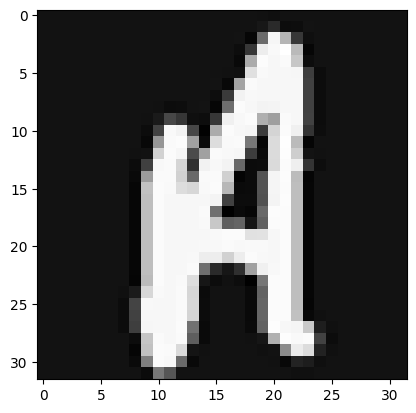

In [ ]:
train_data = scipy.io.loadmat('/content/data/nist36_train.mat')
valid_data = scipy.io.loadmat('/content/data/nist36_valid.mat')
test_data = scipy.io.loadmat('/content/data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

if True: # view the data
    for crop in train_x:
        plt.imshow(crop.reshape(32,32).T, cmap="Greys")
        plt.show()
        break

In [ ]:
############################## Q 3.1 ##############################
max_iters = 50
# pick a batch size, learning rate
batch_size = 27
learning_rate = 0.01
hidden_size = 64
##########################
##### your code here #####
##########################
np.random.seed(0)

batches = get_random_batches(train_x,train_y,batch_size)
batch_num = len(batches)

params = {}

# initialize layers
initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
initialize_weights(hidden_size, train_y.shape[1], params, "output")
layer1_W_initial = np.copy(params["Wlayer1"]) # copy for Q3.3

train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for itr in range(max_iters):
    # record training and validation loss and accuracy for plotting
    h1 = forward(train_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(train_y, probs)
    train_loss.append(loss/train_x.shape[0])
    train_acc.append(acc)

    h1 = forward(valid_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(valid_y, probs)
    valid_loss.append(loss/valid_x.shape[0])
    valid_acc.append(acc)

    total_loss = 0
    avg_acc = 0
    for xb,yb in batches:
        # training loop can be exactly the same as q2!
        ##########################
        ##### your code here #####
        ##########################
         # forward
        h1 = forward(xb,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(yb, probs)

        # loss
        # be sure to add loss and accuracy to epoch totals
        total_loss += loss
        avg_acc += acc / batch_num

        # backward
        delta1 = probs - yb
        delta2 = backwards(delta1,params,'output',linear_deriv)
        backwards(delta2,params,'layer1',sigmoid_deriv)

        # apply gradient to update the parameters
        params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
        params['blayer1'] -= learning_rate * params['grad_blayer1']
        params['Woutput'] -= learning_rate * params['grad_Woutput']
        params['boutput'] -= learning_rate * params['grad_boutput']


    if itr % 2 == 0:
        print("itr: {:02d}   loss: {:.2f}   acc: {:.2f}".format(itr,total_loss,avg_acc))

# record final training and validation accuracy and loss
h1 = forward(train_x,params,'layer1',sigmoid)
probs = forward(h1,params,'output',softmax)
loss, acc = compute_loss_and_acc(train_y, probs)
train_loss.append(loss/train_x.shape[0])
train_acc.append(acc)

h1 = forward(valid_x,params,'layer1',sigmoid)
probs = forward(h1,params,'output',softmax)
loss, acc = compute_loss_and_acc(valid_y, probs)
valid_loss.append(loss/valid_x.shape[0])
valid_acc.append(acc)

# report validation accuracy; aim for 75%
print('Validation accuracy: ', valid_acc[-1])

# compute and report test accuracy
h1 = forward(test_x,params,'layer1',sigmoid)
test_probs = forward(h1,params,'output',softmax)
_, test_acc = compute_loss_and_acc(test_y, test_probs)
print('Test accuracy: ', test_acc)

itr: 00   loss: 32167.24   acc: 0.20
itr: 02   loss: 16266.65   acc: 0.57
itr: 04   loss: 12762.95   acc: 0.67
itr: 06   loss: 10907.89   acc: 0.71
itr: 08   loss: 9666.44   acc: 0.75
itr: 10   loss: 8727.06   acc: 0.77
itr: 12   loss: 7974.21   acc: 0.79
itr: 14   loss: 7353.15   acc: 0.81
itr: 16   loss: 6837.65   acc: 0.82
itr: 18   loss: 6393.74   acc: 0.83
itr: 20   loss: 5978.95   acc: 0.84
itr: 22   loss: 5620.77   acc: 0.85
itr: 24   loss: 5264.02   acc: 0.86
itr: 26   loss: 4948.53   acc: 0.87
itr: 28   loss: 4651.45   acc: 0.88
itr: 30   loss: 4384.13   acc: 0.89
itr: 32   loss: 4141.37   acc: 0.90
itr: 34   loss: 3915.34   acc: 0.90
itr: 36   loss: 3714.04   acc: 0.91
itr: 38   loss: 3505.11   acc: 0.91
itr: 40   loss: 3308.51   acc: 0.92
itr: 42   loss: 3132.14   acc: 0.93
itr: 44   loss: 2978.36   acc: 0.93
itr: 46   loss: 2833.96   acc: 0.94
itr: 48   loss: 2687.38   acc: 0.94
Validation accuracy:  0.7508333333333334
Test accuracy:  0.7611111111111111


In [ ]:
# save the final network
import pickle

saved_params = {k:v for k,v in params.items() if '_' not in k}
with open('/content/q3_weights.pickle', 'wb') as handle:
  pickle.dump(saved_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

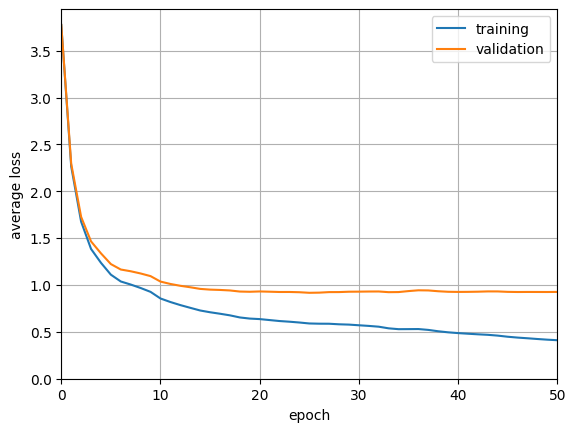

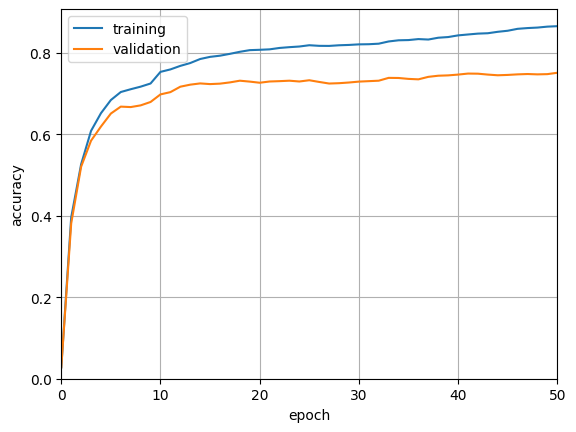

In [ ]:
# plot loss curves
plt.plot(range(len(train_loss)), train_loss, label="training")
plt.plot(range(len(valid_loss)), valid_loss, label="validation")
plt.xlabel("epoch")
plt.ylabel("average loss")
plt.xlim(0, len(train_loss)-1)
plt.ylim(0, None)
plt.legend()
plt.grid()
plt.show()

# plot accuracy curves
plt.plot(range(len(train_acc)), train_acc, label="training")
plt.plot(range(len(valid_acc)), valid_acc, label="validation")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim(0, len(train_acc)-1)
plt.ylim(0, None)
plt.legend()
plt.grid()
plt.show()

## Q3.2 (3 points)

The provided code will visualize the first layer weights as 64 32x32 images, both immediately after initialization and after full training. Generate both visualizations. Comment on the learned weights and compare them to the initialized weights. Do you notice any patterns?

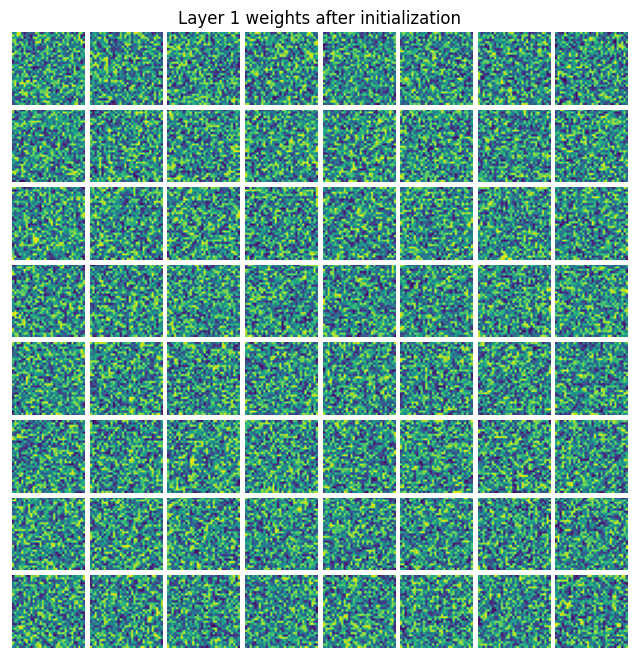

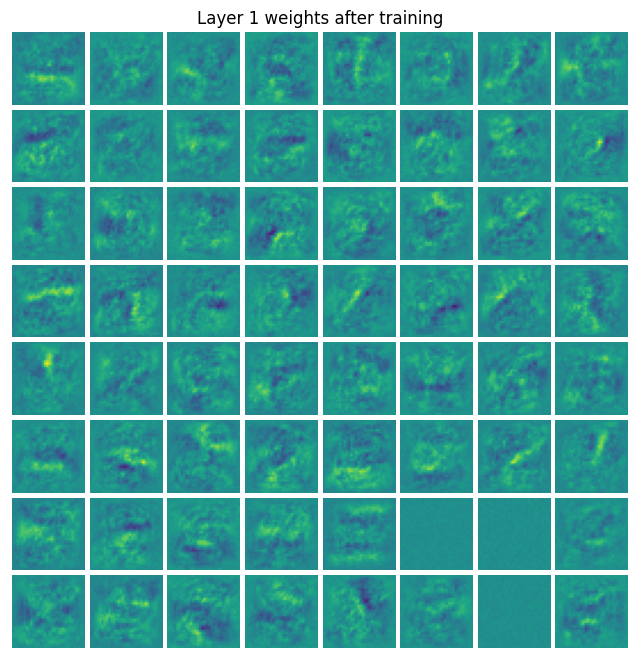

In [ ]:
############################## Q 3.2 ##############################
# visualize weights
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after initialization")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(layer1_W_initial[:,i].reshape((32, 32)).T)
    ax.set_axis_off()
plt.show()

v = np.max(np.abs(params['Wlayer1']))
fig = plt.figure(figsize=(8,8))
plt.title("Layer 1 weights after training")
plt.axis("off")
grid = ImageGrid(fig, 111, nrows_ncols=(8, 8), axes_pad=0.05)
for i, ax in enumerate(grid):
    ax.imshow(params['Wlayer1'][:,i].reshape((32, 32)).T, vmin=-v, vmax=v)
    ax.set_axis_off()
plt.show()

---

The final learned weights have patterns that seem to mimick the pen-strokes made while writing. Each of those weights could be looking for a specific stroke and using that as a feature of the input image. \\
The initial weights are randomised and do not look like they follow any patterns. The distributions are distinct, indicating that the initialisation method is good. \\
The drastic change in the visualization of weights shows that the network has learned enough complex and distinct features to classify the test images.

---

## Q3.3 (3 points)

Use the code in Q3.1 to train and generate accuracy and loss plots for each of these three networks:

(1) one with $10$ times your tuned learning rate,
    
(2) one with one-tenth your tuned learning rate, and

(3) one with your tuned learning rate.
    
Include total of six plots (two will be the same from Q3.1). Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set. Hint: Use fixed random seeds to improve reproducibility.

learning rate:  0.1
Validation accuracy:  0.027777777777777776
Test accuracy:  0.027777777777777776


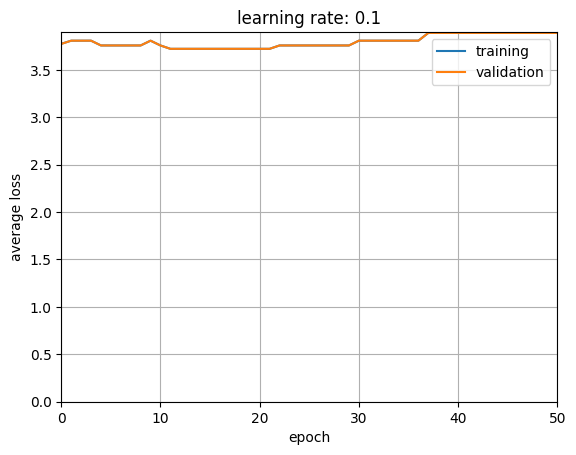

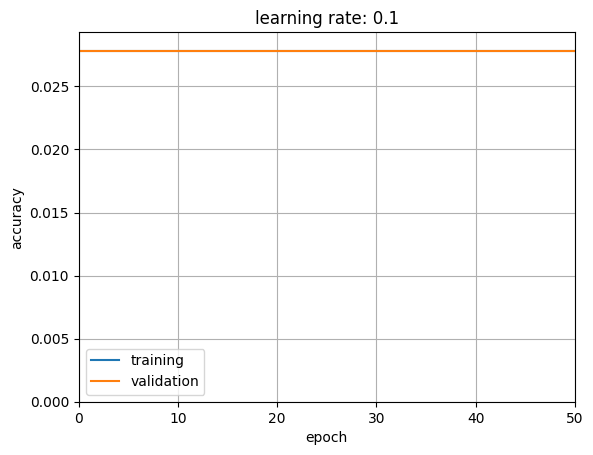

learning rate:  0.001
Validation accuracy:  0.7452777777777778
Test accuracy:  0.7511111111111111


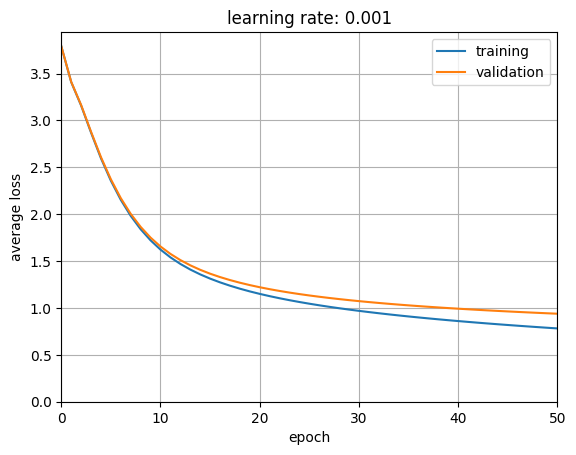

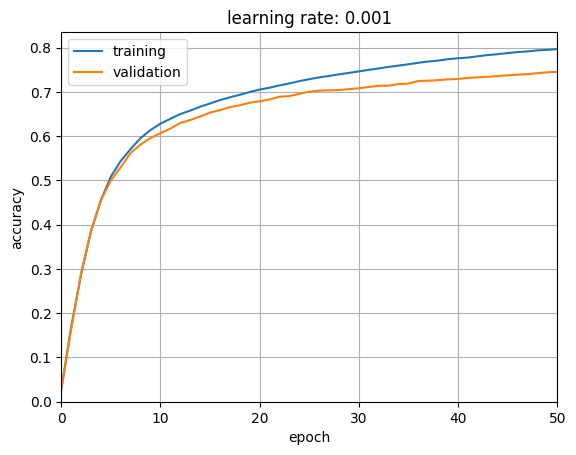

learning rate:  0.01
Validation accuracy:  0.7555555555555555
Test accuracy:  0.7466666666666667


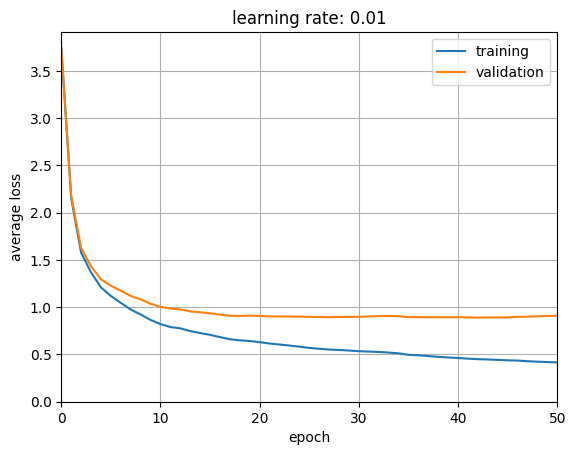

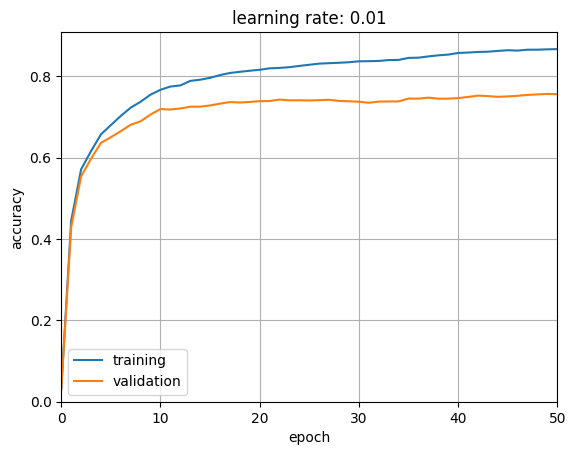

In [ ]:
############################## Q 3.3 ##############################
##########################
##### your code here #####
##########################
np.random.seed(0)
tuned_lr = 0.01
learning_rates = [10*tuned_lr, 0.1*tuned_lr, tuned_lr]
max_iters = 50
batch_size = 27
hidden_size = 64

for learning_rate in learning_rates:
    print("learning rate: ", learning_rate)
    batches = get_random_batches(train_x,train_y,batch_size)
    batch_num = len(batches)

    params = {}

    # initialize layers
    initialize_weights(train_x.shape[1], hidden_size, params, "layer1")
    initialize_weights(hidden_size, train_y.shape[1], params, "output")
    layer1_W_initial = np.copy(params["Wlayer1"]) # copy for Q3.3

    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for itr in range(max_iters):
        # record training and validation loss and accuracy for plotting
        h1 = forward(train_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(train_y, probs)
        train_loss.append(loss/train_x.shape[0])
        train_acc.append(acc)

        h1 = forward(valid_x,params,'layer1',sigmoid)
        probs = forward(h1,params,'output',softmax)
        loss, acc = compute_loss_and_acc(valid_y, probs)
        valid_loss.append(loss/valid_x.shape[0])
        valid_acc.append(acc)

        total_loss = 0
        avg_acc = 0
        for xb,yb in batches:

            # forward
            h1 = forward(xb,params,'layer1',sigmoid)
            probs = forward(h1,params,'output',softmax)
            loss, acc = compute_loss_and_acc(yb, probs)

            # loss
            # be sure to add loss and accuracy to epoch totals
            total_loss += loss
            avg_acc += acc / batch_num

            # backward
            delta1 = probs - yb
            delta2 = backwards(delta1,params,'output',linear_deriv)
            backwards(delta2,params,'layer1',sigmoid_deriv)

            # apply gradient to update the parameters
            params['Wlayer1'] -= learning_rate * params['grad_Wlayer1']
            params['blayer1'] -= learning_rate * params['grad_blayer1']
            params['Woutput'] -= learning_rate * params['grad_Woutput']
            params['boutput'] -= learning_rate * params['grad_boutput']

    # record final training and validation accuracy and loss
    h1 = forward(train_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(train_y, probs)
    train_loss.append(loss/train_x.shape[0])
    train_acc.append(acc)

    h1 = forward(valid_x,params,'layer1',sigmoid)
    probs = forward(h1,params,'output',softmax)
    loss, acc = compute_loss_and_acc(valid_y, probs)
    valid_loss.append(loss/valid_x.shape[0])
    valid_acc.append(acc)

    # report validation accuracy; aim for 75%
    print('Validation accuracy: ', valid_acc[-1])

    # compute and report test accuracy
    h1 = forward(test_x,params,'layer1',sigmoid)
    test_probs = forward(h1,params,'output',softmax)
    _, test_acc = compute_loss_and_acc(test_y, test_probs)
    print('Test accuracy: ', test_acc)

    plt.plot(range(len(train_loss)), train_loss, label="training")
    plt.plot(range(len(valid_loss)), valid_loss, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("average loss")
    plt.title("learning rate: " + str(learning_rate))
    plt.xlim(0, len(train_loss)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()

    # plot accuracy curves
    plt.plot(range(len(train_acc)), train_acc, label="training")
    plt.plot(range(len(valid_acc)), valid_acc, label="validation")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("learning rate: " + str(learning_rate))
    plt.xlim(0, len(train_acc)-1)
    plt.ylim(0, None)
    plt.legend()
    plt.grid()
    plt.show()



---

Learning rates affect the training by defining how much effect do the calculated gradients have on the network weights. \\
A learning rate that is too low causes under-learning, indicating the model is unable to converge around the test data set as it is not being allowed to learn enough. This means that the model is not able to travel all the way to the global minima in the given number of iterations. \\
A learning rate that is too high cuases osciallations around the global minima. The model may get close but due to the high magntitude of gradients, it will be unpredictable. Hence, the model will not converge in this case either. \\
An optimal learning rate will allow the model to learn the right features and also converge to the global minima efficiently.

---

## Q3.4 (3 points)

Compute and visualize the confusion matrix of the test data for your best model. Comment on the top few pairs of classes that are most commonly confused.

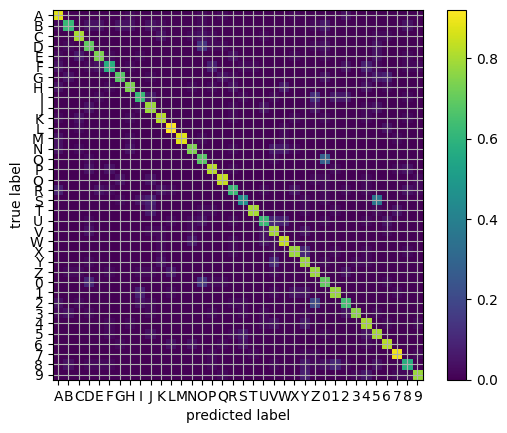

In [ ]:
############################## Q 3.4 ##############################
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))


# compute confusion matrix
h1 = forward(test_x, params, 'layer1', sigmoid)
probs = forward(h1, params, 'output', softmax)
predictions = np.argmax(probs, axis=1)
for true_label, predicted_label in zip(np.argmax(test_y, axis=1), predictions):
    confusion_matrix[true_label, predicted_label] += 1
confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1, keepdims=True)




# visualize confusion matrix
import string
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid()
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
plt.show()

---

Using the confusion matrix, few pairs that are commonly confused include:
1. S and 5: They have very similar pen-strokes and are often mis-interpreted. That point is light blue in the confusion matrix.
1. O and 0: With the only difference being the angle of the ellipse, these are tough for the model to differentiate between. This point is also light blue on the matrix.
1. Z and 2: This point is a slightly darker blue but it is still hard to detect due to very similar pen strokes

---

# Q4 Object Detection and Tracking

## **Initialization**

Run the following code, which imports the modules you'll need and defines helper functions you may need to use later in your implementations.

In [ ]:
import cv2
import numpy as np
import torchvision
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
import torch
import argparse
from PIL import Image
from matplotlib import pyplot as plt
import os
import glob

# Utility functions

coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Create different colors for each class.
COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

def draw_boxes(boxes, labels, image):
    """
    Draws the bounding box around a detected object, also with labels
    """
    image = image.copy()
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)  # Line width
    tf = max(lw - 1, 1) # Font thickness.
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv2.rectangle(
            img=image,
            pt1=(int(box[0]), int(box[1])),
            pt2=(int(box[2]), int(box[3])),
            color=color[::-1],
            thickness=lw
        )
        cv2.putText(
            img=image,
            text=coco_names[labels[i]],
            org=(int(box[0]), int(box[1]-5)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=lw / 3,
            color=color[::-1],
            thickness=tf,
            lineType=cv2.LINE_AA
        )
    return image


def draw_single_track(all_frames, track, track_idx):
    """
    Visualize a track
    """
    image_vis_list = []
    start_frame = track['start_frame']
    num_frames_in_track = len(track['bboxes'])
    print('Visualizing track {} with {} frames, starting from frame {}'.format(track_idx, num_frames_in_track, start_frame))

    for track_frame_num in range(num_frames_in_track):
        frame_num = start_frame + track_frame_num
        image, _, _, _ = all_frames[frame_num]
        bbox = track['bboxes'][track_frame_num]
        image_viz = image.copy()

        # print('Frame: {}, Bbox: {}'.format(frame_num, bbox))
        cv2.rectangle(image_viz, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 4)

        xcentroid, ycentroid = (bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2
        text = "ID {}".format(track_idx)

        cv2.putText(image_viz, text, (xcentroid - 10, ycentroid - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
        cv2.circle(image_viz, (xcentroid, ycentroid), 6, (0, 255, 0), -1)

        image_vis_list.append(image_viz)

    return image_vis_list


def draw_multi_tracks(all_frames, tracks):
    """
    Visualize multiple tracks
    """
    # Mapping from frame number to a list of (bbox, track_idx) tuples
    viz_per_frame = {}

    # Image visualization list
    image_vis_list = []

    # Track idx to color (each track idx has a color)
    track_to_color = {}

    # Loop through the tracks and got the proper info
    for track_idx, track in enumerate(tracks):
        start_frame = track['start_frame']
        num_frames_in_track = len(track['bboxes'])
        print('Visualizing track {} with {} frames, starting from frame {}'.format(track_idx, num_frames_in_track, start_frame))

        for track_frame_num in range(num_frames_in_track):
            frame_num = start_frame + track_frame_num
            bbox = track['bboxes'][track_frame_num]

            if frame_num not in viz_per_frame:
                viz_per_frame[frame_num] = []
            viz_per_frame[frame_num].append((bbox, track_idx))

    # Loop through the frames and draw the boxes
    for frame_num, (image, bboxes, confidences, class_ids) in enumerate(all_frames):
        image_viz = image.copy()

        if frame_num not in viz_per_frame:
            continue

        for bbox, track_idx in viz_per_frame[frame_num]:
            if track_idx not in track_to_color:
                track_to_color[track_idx] = np.random.randint(0, 255, size=3)

            color = track_to_color[track_idx]
            color = (int(color[0]), int(color[1]), int(color[2]))

            cv2.rectangle(image_viz, (bbox[0], bbox[1]), (bbox[2], bbox[3]), color, 4)

            xcentroid, ycentroid = (bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3]) // 2
            text = "ID {}".format(track_idx)

            cv2.putText(image_viz, text, (xcentroid - 15, ycentroid - 15), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 4)
            cv2.circle(image_viz, (xcentroid, ycentroid), 10, color, -1)

        image_vis_list.append(image_viz)

    return image_vis_list

## **Set up data**


In [ ]:
if not os.path.exists('car_frames_simple.zip'):
  !wget https://www.andrew.cmu.edu/user/kvuong/car_frames_simple.zip -O car_frames_simple.zip
  !unzip -qq "car_frames_simple.zip"
  print("downloaded and unzipped data")

--2024-11-21 00:54:21--  https://www.andrew.cmu.edu/user/kvuong/car_frames_simple.zip
Resolving www.andrew.cmu.edu (www.andrew.cmu.edu)... 128.2.42.53
Connecting to www.andrew.cmu.edu (www.andrew.cmu.edu)|128.2.42.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10778523 (10M) [application/zip]
Saving to: ‘car_frames_simple.zip’

car_frames_simple.z 100%[===================>]  10.28M   555KB/s    in 20s     

2024-11-21 00:54:43 (515 KB/s) - ‘car_frames_simple.zip’ saved [10778523/10778523]

downloaded and unzipped data


## **Problem 4.1**: Object Detection with Faster-RCNN


In [ ]:
def get_model(device):
    """
    Load the pretrained model + inference transform
    """
    # Load the model
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights)
    # Load the model onto the computation device
    model = model.eval().to(device)
    # inference transform
    preprocess = weights.transforms()

    return model, preprocess


def predict(image, model, device, detection_threshold):
    """
    Predicts bounding boxes, scores, and class labels for objects detected in an image.
    Only returns detections with confidence above the specified threshold.

    Args:
        image (torch.Tensor): The input image tensor.
        model (torchvision.models.detection.FasterRCNN): The object detection model.
        device (torch.device): The device to perform computations on.
        detection_threshold (float): Confidence threshold for filtering detections.

    Returns:
        boxes (numpy.ndarray): Bounding boxes of detected objects above the confidence threshold. Shape (N, 4),
            where N is the number of detections. Bbox format: (x1, y1, x2, y2)
        scores (numpy.ndarray): Confidence scores for the detected objects. Shape (N,)
        labels (numpy.ndarray): Class labels for the detected objects. Shape (N,)
    """
    # raise NotImplementedError('not implemented')

    # TODO: Move the input image to the specified device (GPU)
    image = image.to(device)
    # TODO: Add a batch dimension to the image tensor
    image = image.unsqueeze(0)
    # TODO: Run the forward pass (with torch.no_grad()) to get model outputs
    with torch.no_grad():
        outputs = model(image)
    # TODO: Extract the scores, bounding boxes, and labels from the model outputs
    scores = outputs[0]['scores'].cpu().numpy()
    boxes = outputs[0]['boxes'].cpu().numpy()
    labels = outputs[0]['labels'].cpu().numpy()
    # TODO: Apply the detection threshold to filter out low-confidence predictions
    indices = np.where(scores >= detection_threshold)
    scores = scores[indices]
    boxes = boxes[indices]
    labels = labels[indices]
    return boxes, scores, labels


def run_detector(image_path, model, preprocess, det_threshold=0.9):
    """
    Runs the object detector on a given image and retrieves bounding boxes, confidence scores,
    and class labels for detected objects.

    Args:
        image_path (str): Path to the image file to detect objects in.
        model (torchvision.models.detection.FasterRCNN): The object detection model.
        preprocess (callable): Preprocessing function for the image.
        det_threshold (float): Confidence threshold for detections.

    Returns:
        image_np (numpy.ndarray): Original image in numpy array format (for visualization later)
        bboxes (numpy.ndarray): Bounding boxes of detected objects.
        confidences (numpy.ndarray): Confidence scores for the detected objects.
        class_ids (numpy.ndarray): Class labels for the detected objects.
    """
    # Read image to tensor (0-255 uint8)
    image_torch = read_image(image_path)
    image_np = image_torch.permute(1, 2, 0).numpy()

    # TODO: Apply the preprocess to preprocess the image (normalization, etc.) (see more at https://pytorch.org/vision/0.20/transforms.html)
    image_processed = preprocess(image_torch)
    # TODO: Run the predict function on image_processed to obtain bounding boxes, scores, and class IDs
    bboxes, confidences, class_ids = predict(image_processed, model, device, det_threshold)
    # raise NotImplementedError('not implemented')

    return (image_np, bboxes, confidences, class_ids)


In [ ]:
# Define the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device == 'cpu':
  print('!!! WARNING: USING CPU ONLY, THIS WILL BE VERY SLOW !!!')

# First, load the model and preprocessor
model, preprocess = get_model(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:00<00:00, 176MB/s]


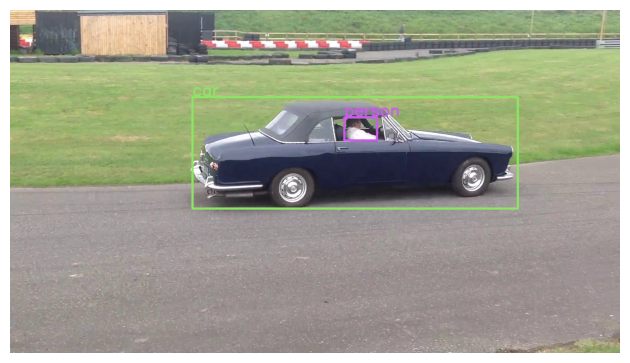

In [ ]:
# TODO: either use wget or manually upload the image to temporary storage (please don't use the same image as the example in the pdf)
# !wget "/content/car_frames_simple/frame_0272.jpg" -O example.png
image_path = "/content/car_frames_simple/frame_0292.jpg"

# Run the detector on the image
output_det = run_detector(image_path, model, preprocess, det_threshold=0.9)
image, bboxes, confidences, class_ids = output_det
image_with_boxes = draw_boxes(bboxes, class_ids, image)
plt.imshow(image_with_boxes)
plt.axis('off')
plt.tight_layout()
plt.show()

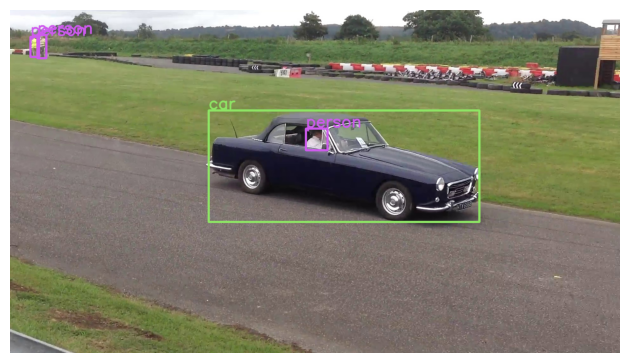

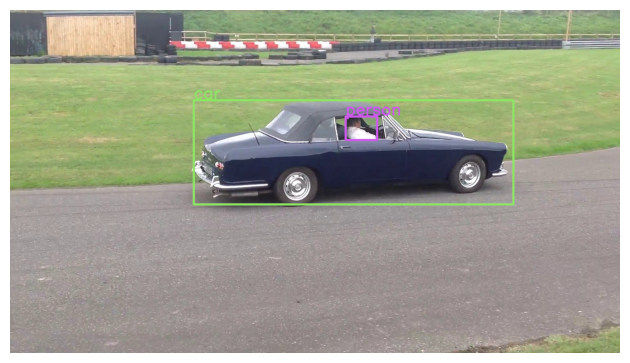

In [ ]:
# TODO: run object detector on every image inside the data folder
image_folder = "./car_frames_simple"
image_paths = sorted(glob.glob(os.path.join(image_folder, "*.jpg")))

output_detections = []
for image_path in image_paths:
    output_det = run_detector(image_path, model, preprocess, det_threshold=0.9)
    output_detections.append(output_det)

# Visualize a few images (first and last image for example)
indices = [0, len(output_detections) - 1]
for idx in indices:
    image, bboxes, confidences, class_ids = output_detections[idx]
    image_with_boxes = draw_boxes(bboxes, class_ids, image)
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## **Problem 4.2**: Multi-object-tracking with IOU-based tracker


### **Compute IOU**

In [1]:
def iou(bbox1, bbox2):
    """
    Calculates the intersection-over-union of two bounding boxes.

    Args:
        bbox1 (numpy.array, list of floats): bounding box in format x1,y1,x2,y2.
        bbox2 (numpy.array, list of floats): bounding box in format x1,y1,x2,y2.

    Returns:
        float: intersection-over-onion of bbox1, bbox2
    """

    # TODO: Calculate the coordinates for the intersection rectangle
    xA = max(bbox1[0], bbox2[0])
    yA = max(bbox1[1], bbox2[1])
    xB = min(bbox1[2], bbox2[2])
    yB = min(bbox1[3], bbox2[3])

    # TODO: Return 0 if there's no overlap. If yes, calculate the ratio of the overlap to each ROI size and the unified size
    size_intersection = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    size_union = (bbox1[2] - bbox1[0] + 1) * (bbox1[3] - bbox1[1] + 1) + \
     (bbox2[2] - bbox2[0] + 1) * (bbox2[3] - bbox2[1] + 1) - size_intersection
    # raise NotImplementedError('not implemented')

    return size_intersection / size_union

### **IOU-based Tracker**

In [ ]:
def track_iou(detections, sigma_l, sigma_h, sigma_iou, t_min):
    """
    Implements a simple IoU-based multi-object tracker. Matches detections to existing tracks based on IoU.
    Detections with IoU above a threshold are linked to existing tracks; otherwise, new tracks are created.

    See "High-Speed Tracking-by-Detection Without Using Image Information by Bochinski et al. for
    more information.

    Args:
         detections (list): list of detections per frame
         sigma_l (float): low detection threshold.
         sigma_h (float): high detection threshold.
         sigma_iou (float): IOU threshold.
         t_min (float): minimum track length in frames.

    Returns:
        list: list of tracks. Each track is a dict containing 'bboxes': a list of bounding boxes, 'max_score': the
        maximum detection score, and 'start_frame': the frame index of the first detection.
    """

    # Initialize an empty list to store active and completed tracks
    tracks_active = []
    tracks_finished = []

    # Loop over each frame’s detections
    for frame_num, detections_frame in enumerate(detections):
        # TODO: Apply low threshold sigma_l to filter low-confidence detections
        dets = []
        for det_frame in detections_frame:
            if det_frame['score'] >= sigma_l:
                dets.append(det_frame)

        # TODO: Apply high threshold sigma_h to filter high-confidence detections
        for det in dets:
            if det['score'] >= sigma_h:
                tracks_active.append({'bboxes': [det['bbox']], 'max_score': det['score'], 'start_frame': frame_num})

        updated_tracks = []
        for track in tracks_active:
            track_updated = False

            # If there are detections for this frame
            if len(dets) > 0:
                # TODO: get det with highest iou
                best_match = dets[0]
                highest_iou = 0.
                for det in dets:
                  if iou(track['bboxes'][-1], det['bbox']) > highest_iou:
                    highest_iou = iou(track['bboxes'][-1], det['bbox'])
                    best_match = det

                # If IoU of best_match, exceeds sigma_iou, then extend the track by adding the detection to the track,
                # update the max_score, then remove that detection from the dets. Remember to set track_updated to True.
                if iou(track['bboxes'][-1], best_match['bbox']) >= sigma_iou:
                    # TODO: fill in the code here ...
                    track['bboxes'].append(best_match['bbox'])
                    track['max_score'] = max(track['max_score'], best_match['score'])
                    updated_tracks.append(track)
                    dets.remove(best_match)
                    track_updated = True
                else:
                    updated_tracks.append(track)


            # If track was not updated
            if not track_updated:
                # TODO: finish track when the conditions are met by appending the track to tracks_finished
                if track['max_score'] >= sigma_h and len(track['bboxes']) >= t_min:
                    tracks_finished.append(track)
                # raise NotImplementedError('not implemented')

        # create new tracks
        new_tracks = [{'bboxes': [det['bbox']], 'max_score': det['score'], 'start_frame': frame_num} for det in dets]
        tracks_active = updated_tracks + new_tracks

    # finish all remaining active tracks
    tracks_finished += [track for track in tracks_active
                        if track['max_score'] >= sigma_h and len(track['bboxes']) >= t_min]

    return tracks_finished

### **Run Tracker**

In [ ]:
def run_tracker(frames):
    # Track objects in the video
    detections = []
    for frame_num, (image, bboxes, confidences, class_ids) in enumerate(frames):
        dets = []
        for bbox, confidence, class_id in zip(bboxes, confidences, class_ids):
            dets.append({'bbox': (int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])),
                         'score': confidence,
                         'class': class_id})
        detections.append(dets)

    print('Running tracker...')
    tracks = track_iou(detections, sigma_l=0.4, sigma_h=0.7, sigma_iou=0.3, t_min=2)
    print('Tracker finished!')
    return tracks


Running tracker...
Tracker finished!
Visualizing track 0 with 2 frames, starting from frame 0
Visualizing track 1 with 2 frames, starting from frame 0
Visualizing track 2 with 2 frames, starting from frame 0
Visualizing track 3 with 2 frames, starting from frame 0
Visualizing track 4 with 2 frames, starting from frame 1
Visualizing track 5 with 2 frames, starting from frame 0
Visualizing track 6 with 2 frames, starting from frame 0
Visualizing track 7 with 2 frames, starting from frame 0
Visualizing track 8 with 2 frames, starting from frame 0
Visualizing track 9 with 2 frames, starting from frame 0
Visualizing track 10 with 2 frames, starting from frame 0
Visualizing track 11 with 2 frames, starting from frame 0
Visualizing track 12 with 2 frames, starting from frame 0
Visualizing track 13 with 2 frames, starting from frame 0
Visualizing track 14 with 2 frames, starting from frame 0
Visualizing track 15 with 2 frames, starting from frame 0
Visualizing track 16 with 2 frames, starting 

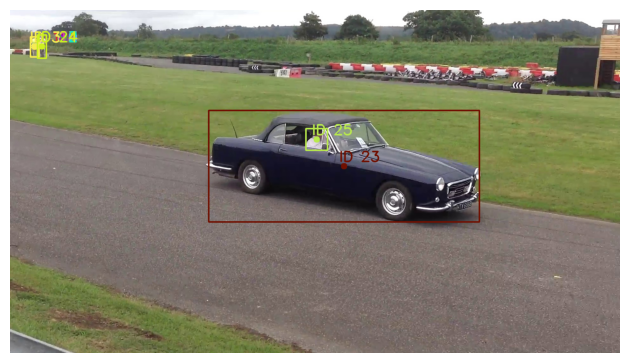

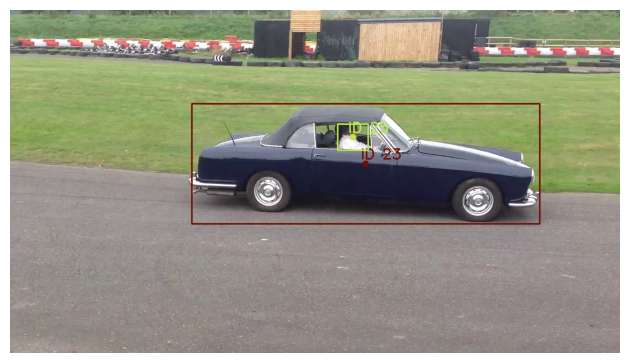

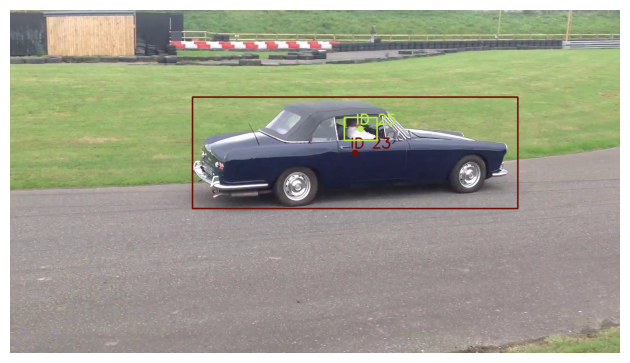

In [ ]:
# TODO: From the detections, run the tracker to obtain a list of tracks
output_tracks = run_tracker(output_detections)

# Visualize the tracks
image_vis_list = draw_multi_tracks(output_detections, output_tracks)

# TODO: Visualize a few images (here we show first, middle, and last image for example)
indices = [0, len(output_detections) // 2, len(output_detections) - 1]
for idx in indices:
    plt.imshow(image_vis_list[idx])
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Q5 (Extra Credit) Extract Text from Images

Run below code to download and put the unzipped data in '/content/images' folder. We have provided you with 01_list.jpg, 02_letters.jpg, 03_haiku.jpg and 04_deep.jpg to test your implementation on.

In [ ]:
if not os.path.exists('/content/images'):
  os.mkdir('/content/images')
  !wget http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip -O /content/images/images.zip
  !unzip "/content/images/images.zip" -d "/content/images"
  os.system("rm /content/images/images.zip")

--2024-11-21 02:41:50--  http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3248168 (3.1M) [application/zip]
Saving to: ‘/content/images/images.zip’

/content/images/ima 100%[===================>]   3.10M   610KB/s    in 7.1s    

2024-11-21 02:41:58 (445 KB/s) - ‘/content/images/images.zip’ saved [3248168/3248168]

Archive:  /content/images/images.zip
mapname:  conversion of  failed
  inflating: /content/images/03_haiku.jpg  
  inflating: /content/images/01_list.jpg  
  inflating: /content/images/02_letters.jpg  
  inflating: /content/images/04_deep.jpg  


In [ ]:
ls /content/images

01_list.jpg*  02_letters.jpg*  03_haiku.jpg*  04_deep.jpg*


## Q5.1 (Extra Credit) (4 points)

The method outlined above is pretty simplistic, and while it works for the given text samples, it makes several assumptions. What are two big assumptions that the sample method makes?

---

The sample method makes the following two big assumptions:
1. It assumes that the handwriting in the images is in block letters. All letters shown are unconnected and evenly spaced out. If they were written in an average person's handwriting, there would be instances of overlap, missing pen strokes and even inconsistency in writing the same letters. The model will struggle to handle these cases and especially struggle with cursive handwriting.
1. It assumes a straightforward left-to-right linear combination of letters as words or sentences. In cases where the text is divided into columns, text boxes or even random arrangements of words such as one might have while making lecture notes, the model will not be able to perform adequately.

---


## Q5.2 (Extra Credit) (10 points)

Implement the findLetters() function to find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image im. Each row of the matrix should contain [y1,x1,y2,x2], the positions of the top-left and bottom-right corners of the box. The black-and-white image should be between 0.0 to 1.0, with the characters in white and the background in black (consistent with the images in nist36). Hint: Since we read text left to right, top to bottom, we can use this to cluster the coordinates.

In [ ]:
############################## Q 5.2 ##############################
def findLetters(image):
    """
    takes a color image
    returns a list of bounding boxes and black_and_white image
    """
    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes
    # this can be 10 to 15 lines of code using skimage functions

    ##########################
    ##### your code here #####
    ##########################
    image_gray = skimage.color.rgb2gray(image)
    image_denoised = skimage.restoration.denoise_bilateral(image_gray)

    image_thresh = skimage.filters.threshold_otsu(image_denoised)
    image_bw = image_denoised < image_thresh
    image_bw = skimage.morphology.opening(image_bw)
    image_bw = skimage.morphology.closing(image_bw, skimage.morphology.square(9))
    labeled_image, num_features = skimage.measure.label(image_bw, return_num=True)

    regions = skimage.measure.regionprops(labeled_image)
    avg_area = sum([region.area for region in regions]) / num_features


    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        if (maxr - minr) * (maxc - minc) > avg_area:
            bboxes.append([minr, minc, maxr, maxc])

    bw = image_bw

    return bboxes, bw

## Q5.3 (Extra Credit) (3 points)

Using the provided code below, visualize all of the located boxes on top of the binary image to show the accuracy of your findLetters() function. Include all the provided sample images with the boxes.


01_list.jpg


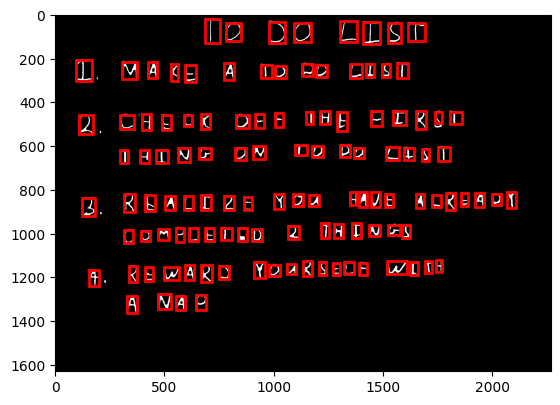


02_letters.jpg


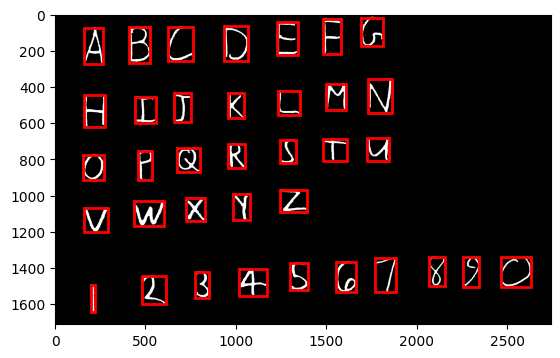


03_haiku.jpg


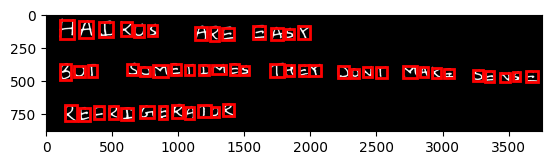


04_deep.jpg


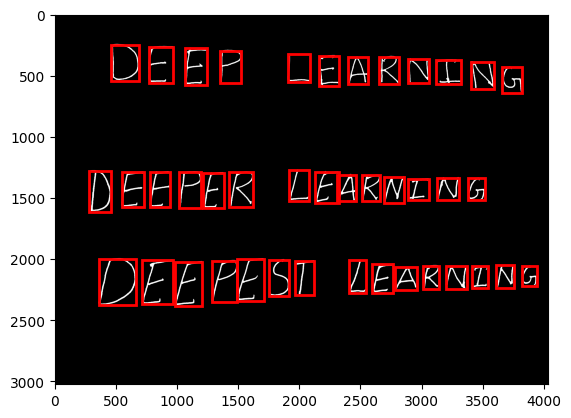

In [ ]:
############################## Q 5.3 ##############################
# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)

    print('\n' + img)
    plt.imshow(1-bw, cmap="Greys") # reverse the colors of the characters and the background for better visualization
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

## Q5.4 (Extra Credit) (8 points)

You will now load the image, find the character locations, classify each one with the network you trained in Q3.1, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. If you find that your classifier performs poorly, consider dilation under skimage morphology to make the letters thicker.

Your solution is correct if you can correctly detect most of the letters and classify approximately 70\% of the letters in each of the sample images.

Run your code on all the provided sample images in '/content/images'. Show the extracted text. It is fine if your code ignores spaces, but if so, please provide a written answer with manually added spaces.

In [ ]:
############################## Q 5.4 ##############################
for imgno, img in enumerate(sorted(os.listdir('/content/images'))):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('/content/images',img)))
    bboxes, bw = findLetters(im1)
    print('\n' + img)

    # find the rows using..RANSAC, counting, clustering, etc.
    ##########################
    ##### your code here #####
    ##########################
    for b in bboxes:
      centroids = [b, ((b[0] + b[2]) // 2, (b[1] + b[3]) // 2)]
      sorted_centroids = sorted(centroids,  key=lambda x: (x[1][0], x[1][1]))

    rows = []
    for box, centroid in centroids:
      row_found = False
      for row in rows:
        nBoxes = len(row)
        y_avg = 0
        tol = 0
        for r in row:
          y_avg += (r[0][0] + r[0][2]) // 2
          tol += (r[0][2] - r[0][0])
        tol /= nBoxes
        y_avg /= nBoxes
        if abs(centroid[0] - y_avg) < tol:
          row.append((box, centroid))
          row_found = True
          break
      if not row_found:
        rows.append([(box, centroid)])

    for row in rows:
      rows = sorted(row, key=lambda x: x[1])
    rows = rows[0]

    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    ##########################
    ##### your code here #####
    ##########################
    cropped_images = []
    for bbox in bboxes:
      minr, minc, maxr, maxc = bbox
      cropped_image = im1[minr:maxr, minc:maxc]




    # load the weights
    # run the crops through your neural network and print them out
    import pickle
    import string
    letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
    params = pickle.load(open('/content/q3_weights.pickle','rb'))
    ##########################
    ##### your code here #####
    ##########################



---

YOUR ANSWER HERE... (if your code ignores spaces)

---